## LDA is a probabilistic model to find cluster assignments for documents

### Uses 2 probability values to cluster documents:
### P(Word| topic) and P(topics| documents)

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
print('Done')

Done


In [7]:
headlines_df = pd.read_excel('ISG Evidence Package Report R12 5-1-19.xlsx')
print('Done')

Done


In [9]:
headlines_df.shape

(100536, 27)

In [10]:
NUM_SAMPLES = 10000

In [11]:
headlines_df = headlines_df.sample(NUM_SAMPLES, replace=False).reset_index(drop=True)

In [13]:
headlines_df.head(5)

,Case Number,PIN,Call Status,Priority,NCCA Number - ALL,Last Analyst,Optional 1,Problem,Product Model,Functional Area,...,Date Created,Account Number,Name,Parent Dealer Account and Name,Well Prepared?,Reason,Classification,CC,CSC,Case Text
0,ISG-2897,NaN,Resolved-Completed,2-Normal,NaN,JOE HANNER,NaN,"Login Help -Customer getting error ""Account is...",AMS MyJohnDeere/Website-Dashboard/Information ...,Website UserMgmt,...,2018-09-12 19:19:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Product Model: AMS MyJohnDeere/Website-Dashboa...
1,DTAC-347065,PCGU2UA350576,Resolved-Completed,2-Normal,NaN,CAMILA MCMARTIN,NaN,"GreenStar3 2630 Display Basics, Section Contro...",AMS 2630/GreenStar 3/Display,Act/Sub/Offer,...,2018-11-09 09:00:25,080478,RDO Equipment Co.,080478RDO Equipment Co.,NaN,Not Applicable,NaN,Activations,Activate,Product Model: AMS 2630/GreenStar 3/DisplayFun...
2,16345420,PCS161B957192,Closed,3-Normal,NaN,"Dalcin, Leandro",NaN,"SF3 Ready, RTK Ready Activation",AMS StarFire 6000/StarFire/GPS Receiver,Act/Sub/Offer,...,2018-05-09 13:05:00,201216,ITAETE COMERCIO DE MAQUINAS AGRICOLAS LTDA,201216 - ITAETE COMERCIO DE MAQUINAS AGRICOLAS...,F,NaN,15b - Activate,NaN,NaN,"Dalcin, Leandro, 09 May 2018 13:06 GMT Dealer ..."
3,DTAC-519161,xxxxxxxxxxxxxxxxx,Resolved-System Closed,2-Normal,NaN,NaN,DE106460,Ops Center - Customer org does not have Termin...,Operations Center/Agriculture - Website/Inform...,Website Org Mgmt,...,2019-04-01 10:32:32,179419,The W. I. Clark Company,179419The W. I. Clark Company,Yes,x,NaN,Customer/Dealer,NaN,Called Mike - verified he could see the settin...
4,DTAC-530250,PCSR54C592219,Resolved-Dealer Closed,2-Normal,NaN,Luiz V Prates da Cruz Jr,NaN,RADIO RTK NÃO COMUNICA / RTK radio 450MHz failure,AMS StarFire RTK/450 MHz Radio/Communication,Communication/Hdw,...,2019-04-08 10:18:31,201115,SOLUCOES INTEGRADAS VERDES VALES LTDA,201115SOLUCOES INTEGRADAS VERDES VALES LTDA,No,Informações incompletas para diagnóstico do re...,NaN,NaN,NaN,Obrigado Luiz. Conforme foi conversado por tel...


In [20]:
X = headlines_df[r'Case Text']
X.head(10)

0    Product Model: AMS MyJohnDeere/Website-Dashboa...
1    Product Model: AMS 2630/GreenStar 3/DisplayFun...
2    Dalcin, Leandro, 09 May 2018 13:06 GMT Dealer ...
3    Called Mike - verified he could see the settin...
4    Obrigado Luiz. Conforme foi conversado por tel...
5    This was actually a 30 day demo.Dealer Name: R...
6    ###### Bechtel, Pamela, 14 Jun 2018 12:53 GMT ...
7    Product Model: AMS 2630/GreenStar 3/DisplayFun...
8    Hallo David,wie im der L&ouml;sung 110454 besc...
9    Called Bryan,Explained that this was an issue ...
Name: Case Text, dtype: object

In [24]:
count_vectorizer = CountVectorizer(ngram_range=(2,2))
#transformed_vector = count_vectorizer.fit_transform(X)
transformed_vector = count_vectorizer.fit_transform(headlines_df['Case Text'].values.astype('U'))

In [25]:
transformed_vector.shape

(10000, 410526)

In [27]:
feature_names = count_vectorizer.get_feature_names()
feature_names[200:205]

['00142379 fechando',
 '00147 000148',
 '00150282 68363154return',
 '00156521 11625956',
 '00158284importante as']

In [33]:
NUM_TOPICS = 20
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=20)
lda= lda_model.fit_transform(transformed_vector)   
print('Done')

Done


In [31]:
lda.shape


(10000, 20)

In [34]:
lda[:2]

array([[5.43478261e-04, 7.91396142e-01, 5.43478262e-04, 5.43478270e-04,
        5.43478261e-04, 1.98821250e-01, 5.43478262e-04, 5.43478266e-04,
        5.43478261e-04, 5.43478261e-04, 5.43478261e-04, 5.43478263e-04,
        5.43478262e-04, 5.43478262e-04, 5.43478261e-04, 5.43478261e-04,
        5.43478268e-04, 5.43478261e-04, 5.43478263e-04, 5.43478262e-04],
       [5.10204082e-04, 5.10204084e-04, 5.10204082e-04, 5.10204083e-04,
        5.10204089e-04, 5.10204082e-04, 5.10204088e-04, 6.59923367e-01,
        5.10204082e-04, 2.33988556e-01, 5.10204083e-04, 5.10204086e-04,
        5.10204083e-04, 4.84201157e-02, 5.10204082e-04, 5.10204082e-04,
        5.10204083e-04, 5.10204082e-04, 5.10204085e-04, 4.95046968e-02]])

In [35]:
sum(lda[0])

1.0000000000000004

In [39]:
def print_topic (identifier,top_words=10):
    for topic_id,topic_word_probs in enumerate(lda_model.components_): #how often a word oppears with topic
        if topic_id == identifier:
            print ("Topic %d:" % (topic_id))
            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words -1 :-1]]
            print (" ".join(top_feature_names))

In [40]:
for i in range (14):
    print_topic(i, top_words = 3)


Topic 0:
as informações na solução informações de
Topic 1:
org number org name name dealer
Topic 2:
this case dtac system case text
Topic 3:
org name org number customer org
Topic 4:
sf2 ready se aplicável ready sf6000
Topic 5:
john deere intelligent solutions deere intelligent
Topic 6:
updates attach version last in config
Topic 7:
product model user id problem line
Topic 8:
software manager system recovery the usb
Topic 9:
dlr called called in worked closing
Topic 10:
tank mix machinery inc 4g lte
Topic 11:
global support support center ccedil atilde
Topic 12:
global support support center the global
Topic 13:
ccedil atilde ccedil otilde otilde es


In [44]:
topics=[]
for i in range(NUM_SAMPLES):
    topics.append(lda[i].argmax()
                 )
headlines_df['topic'] = topics
headlines_df.head

<bound method NDFrame.head of       Case Number                PIN             Call Status  Priority  \
0        ISG-2897                NaN      Resolved-Completed  2-Normal   
1     DTAC-347065      PCGU2UA350576      Resolved-Completed  2-Normal   
2        16345420      PCS161B957192                  Closed  3-Normal   
3     DTAC-519161  xxxxxxxxxxxxxxxxx  Resolved-System Closed  2-Normal   
4     DTAC-530250      PCSR54C592219  Resolved-Dealer Closed  2-Normal   
...           ...                ...                     ...       ...   
9995  DTAC-188034      pcmamgc413817      Resolved-Completed  2-Normal   
9996  DTAC-521999      PCMAMGC718204  Resolved-Dealer Closed  2-Normal   
9997  DTAC-520111      PCGU2UD471927  Resolved-System Closed  2-Normal   
9998  DTAC-229107      pcgu2uk677204      Resolved-Completed  2-Normal   
9999  DTAC-197542      pcgu18e112841      Resolved-Completed  2-Normal   

     NCCA Number - ALL              Last Analyst Optional 1  \
0                 

## Manifold _ used for non linear data

In [45]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, init='pca', random_state = 0)

In [46]:
lda_2d_tsne= tsne.fit_transform(lda)
print('done')

done


In [53]:
lda_df_tsne = pd.DataFrame(lda_2d_tsne)
lda_df_tsne.shape

(10000, 2)

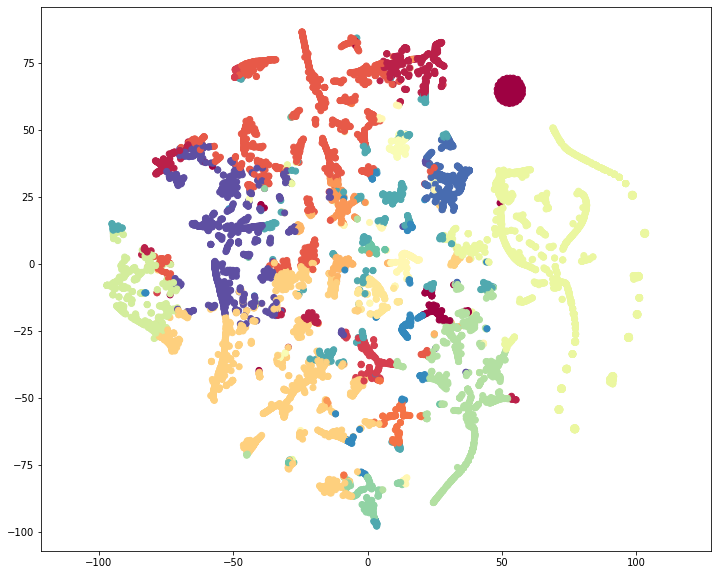

In [55]:
plt.subplots(figsize = (12,10))
plt.axis('equal');
plt.scatter(lda_df_tsne[0], lda_df_tsne[1], c=headlines_df['topic'],cmap=plt.cm.Spectral)

## PYLDAVIS

In [88]:
#dbpedia_df = pd.read_excel('ISG Evidence Package Report R12 5-1-19.xlsx', columns=['Case Number', 'Product Model', 'Case Text'])
dbpedia_df = pd.read_excel('ISG Evidence Package Report R12 5-1-19.xlsx',usecols=[0,8,26])
print('Done')

Done


In [89]:
dbpedia_df.size


301608

In [90]:
dbpedia_df.head(5)

,Case Number,Product Model,Case Text
0,16451489,AMS APEX/Desktop Software/Information Management,"White, Derek, 26 Apr 2019 07:30 GMT Dealer Nam..."
1,16451481,AMS ActImpGuidance/Active Implement Guidance/G...,"White, Derek, 24 Apr 2019 10:08 GMT Dealer Nam..."
2,16451455,AMS APEX/Desktop Software/Information Management,"White, Derek, 11 Apr 2019 08:42 GMT Dealer Nam..."
3,16451405,Operations Center/Agriculture - Website/Inform...,"###### Hanner, Joe, 29 Mar 2019 00:54 GMT DTAC..."
4,16451400,GSC Web Form/Information Management,"FORMUSER, 28 March 2019 16:23 GMT Op Center su..."


In [98]:
sorted(dbpedia_df['Product Model'].unique().astype(str))

['(DNU) ApplicationPro/Spreader, Seeder Pro (ISO)/Field and Crop Solutions',
 '(DNU) Gen 4 CommandCenter/Generation 4/Display',
 '(DNU) StarFire Mobile RTK/AutoTrac 00-10 Sprayer/Ag Management Solutions',
 '(DNU) StarFire Mobile RTK/AutoTrac 20 Series Sprayer/Ag Management Solutions',
 '(DNU) StarFire Mobile RTK/AutoTrac 9000 Combine/Ag Management Solutions',
 '(DNU) StarFire Mobile RTK/Field Documentation/Ag Management Solutions',
 '(DNU) StarFire Mobile RTK/Harvest Doc/Ag Management Solutions',
 '(DNU) StarFire Mobile RTK/StarFire Mobile RTK/GPS Receiver',
 '(DNU) StarFire Mobile RTK/TCM - Terrain Compensation Module/Ag Management Solutions',
 '(DNU) StarFire RTK/RTK/GPS Receiver',
 '(DNU) Surface Water/Surface Water Pro & SWP Plus/Field and Crop Solutions',
 '(DNU) WDT/AMS WDT/Information Management',
 '(DNU) iTEC Pro/iTEC Pro/Guidance',
 '100D/Fertilizer Spreader/LG Attachments',
 '1010E/Wheeled/Forwarder',
 '102/JD Lawn and Garden Tractors/Riding Lawn Equipment',
 '1025R/1R LV (D_

In [99]:
X=dbpedia_df['Case Text']
X.head()

0    White, Derek, 26 Apr 2019 07:30 GMT Dealer Nam...
1    White, Derek, 24 Apr 2019 10:08 GMT Dealer Nam...
2    White, Derek, 11 Apr 2019 08:42 GMT Dealer Nam...
3    ###### Hanner, Joe, 29 Mar 2019 00:54 GMT DTAC...
4    FORMUSER, 28 March 2019 16:23 GMT Op Center su...
Name: Case Text, dtype: object

In [107]:
count_vectorizer = CountVectorizer(max_df=1000, min_df=3)
#transformed_vector = count_vectorizer.fit_transform(X)
transformed_vector = count_vectorizer.fit_transform(headlines_df['Case Text'].values.astype('U'))

MemoryError: 